In [1]:
%load_ext autoreload

In [2]:
%aimport discriminator.discriminator_wrapper
%aimport discriminator.discriminator 
%aimport discriminator.discriminator_attend_text 
from discriminator.discriminator_wrapper import DiscriminatorWrapper, plot_losses
from coco_utils import load_coco_data_struct
import tensorflow as tf
import numpy as np
%autoreload 1

Using TensorFlow backend.


### Load data

In [3]:
attention_mode = True
learner = DiscriminatorWrapper.textual_attn_type_key
if attention_mode:
    vocab_data, train_data, _ = load_coco_data_struct(base_dir="datasets/self_process", 
                                                             source_image_features='block5_conv4_max_pooled',
                                                             is_caption_separated=True,
                                                             mock_val=True)
    val_data, train_data = train_data.split(0.3)
else:
    vocab_data, train_data, val_data = load_coco_data_struct()


Loaded vocab data.
Embedding <class 'numpy.ndarray'> (2593, 304) float64
Word to index <class 'dict'> 2593
Index to word <class 'list'> 2593

Loaded train data.
Captions <class 'numpy.ndarray'> (407521, 19) int64
Image indices <class 'numpy.ndarray'> (407521,) int64
Image features <class 'numpy.ndarray'> (82783, 7, 7, 512) float32
Image urls <class 'numpy.ndarray'> (82783,) <U71

Loaded val data.
Captions <class 'numpy.ndarray'> (1000, 19) int64
Image indices <class 'numpy.ndarray'> (1000,) int64
Image features <class 'numpy.ndarray'> (1000, 7, 7, 512) float32
Image urls <class 'numpy.ndarray'> (1000,) <U71

Splitting train data with ratio 0.3

Loaded train data.
Captions <class 'numpy.ndarray'> (122256, 19) int64
Image indices <class 'numpy.ndarray'> (122256,) int64
Image features <class 'numpy.ndarray'> (82783, 7, 7, 512) float32
Image urls <class 'numpy.ndarray'> (82783,) <U71

Loaded train data.
Captions <class 'numpy.ndarray'> (285265, 19) int64
Image indices <class 'numpy.ndarra

### Pretrain and save

In [4]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
disc = DiscriminatorWrapper(train_data, val_data, vocab_data, learner_type=learner)
tf.global_variables_initializer().run()

Building learner textual_attn...
Building classification
seq mask:  Tensor("SequenceMask/Less:0", shape=(?, ?), dtype=bool)
exp:  Tensor("Exp:0", shape=(?, 7, 7, ?), dtype=float32)
bin mask:  Tensor("ExpandDims_4:0", shape=(?, 1, 1, ?), dtype=float32)
ctx map:  Tensor("Sum_1:0", shape=(?, 7, 7, ?), dtype=float32)
alphas:  Tensor("truediv:0", shape=(?, 7, 7, ?), dtype=float32)
weighed contxt:  Tensor("Sum_3:0", shape=(?, 7, 7, 512), dtype=float32)
lstm word ctx:  Tensor("lstm_ctx/dense/BiasAdd:0", shape=(?, ?, 512), dtype=float32)
img_ctx:  Tensor("Conv/Relu:0", shape=(?, 7, 7, 512), dtype=float32)
relevancy map:  Tensor("Sum_4:0", shape=(?, 7, 7), dtype=float32)
flat rel:  Tensor("Flatten/Reshape:0", shape=(?, 28), dtype=float32)
final alpahas:  Tensor("Max_2:0", shape=(?, ?), dtype=float32)
logits:  Tensor("rel_to_logits/dense/BiasAdd:0", shape=(?, 2), dtype=float32)


In [5]:
batch_size = 100
iter_num = 2
train_loss, val_loss = disc.pre_train(sess, iter_num=iter_num, batch_size=batch_size)

iter 0, loss: 7.402717113494873
train accuracy: 0.535
[[67 33]
 [60 40]]


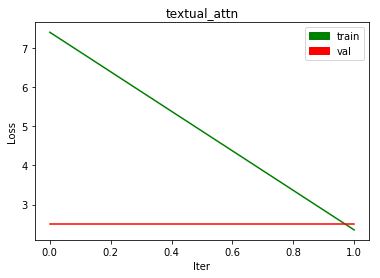

In [6]:
plot_losses(train_loss, val_loss, title=learner)

val accuracy: 0.6
[[5 0]
 [4 1]]
P/G: 1/1.0 | Avg reward: 0.058549221605062485


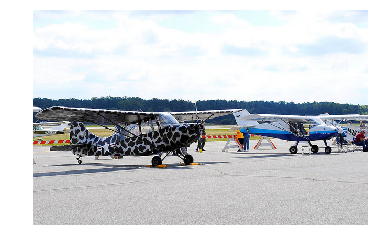

some            0.61           , attn: 0.99
small           0.033          , attn: 0.053
airplanes       0.032          , attn: 0.052
are             0.011          , attn: 0.019
parked          0.0083         , attn: 0.013
on              0.002          , attn: 0.0032
the             0.00063        , attn: 0.001
pavement        0.0014         , attn: 0.0023
near            0.00035        , attn: 0.00057
an              0.00019        , attn: 0.00031
airfield        0.00055        , attn: 0.00089
<END>           0.0022         , attn: 0.0035
- - - -
P/G: 0/1.0 | Avg reward: 0.0032824650406837463


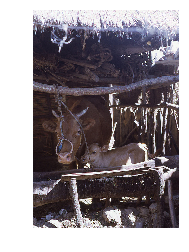

a               0.039          , attn: 0.082
cow             1.9e-08        , attn: 4e-08
and             5e-13          , attn: 1e-12
a               7.9e-17        , attn: 1.6e-16
calf            5e-18          , attn: 1e-17
are             2.9e-19        , attn: 6e-19
inside          1.4e-21        , attn: 2.9e-21
of              9.6e-25        , attn: 2e-24
a               6.4e-27        , attn: 1.3e-26
rustic          3.5e-27        , attn: 7.3e-27
stable          4.7e-25        , attn: 9.6e-25
<END>           5.1e-21        , attn: 1.1e-20
- - - -
P/G: 0/1.0 | Avg reward: 0.0443161241710186


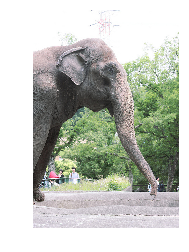

an              0.47           , attn: 0.99
elephant        0.02           , attn: 0.042
standing        0.00038        , attn: 0.00082
on              2.2e-05        , attn: 4.6e-05
a               2.4e-07        , attn: 5.2e-07
dirty           1.3e-07        , attn: 2.7e-07
field           4.1e-07        , attn: 8.8e-07
surrounded      5.8e-08        , attn: 1.2e-07
by              1.5e-08        , attn: 3.1e-08
trees           5.4e-08        , attn: 1.2e-07
<END>           4e-07          , attn: 8.5e-07
- - - -
P/G: 0/1.0 | Avg reward: 0.01987258344888687


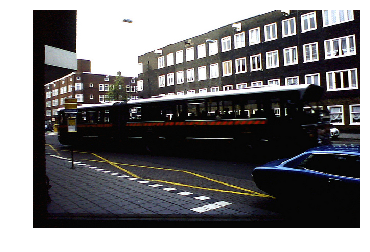

a               0.16           , attn: 1.0
trolley         0.019          , attn: 0.12
is              5.7e-05        , attn: 0.00036
traveling       1e-08          , attn: 6.5e-08
down            6e-10          , attn: 3.7e-09
a               2.7e-12        , attn: 1.7e-11
busy            2.1e-14        , attn: 1.3e-13
street          3.5e-16        , attn: 2.2e-15
<END>           8.1e-14        , attn: 5e-13
- - - -
P/G: 0/1.0 | Avg reward: 0.03504517674446106


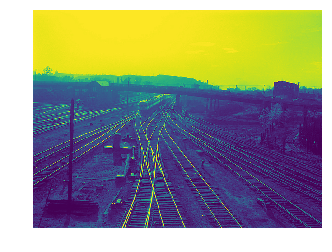

a               0.32           , attn: 0.97
train           0.01           , attn: 0.031
approaches      0.01           , attn: 0.031
<UNK>           0.027          , attn: 0.083
a               0.00046        , attn: 0.0014
<UNK>           0.002          , attn: 0.006
of              0.0002         , attn: 0.00059
multiple        0.00021        , attn: 0.00063
railroad        0.00058        , attn: 0.0018
tracks          0.006          , attn: 0.018
<END>           0.0089         , attn: 0.027
- - - -
P/G: 0/0.0 | Avg reward: 0.06096785515546799


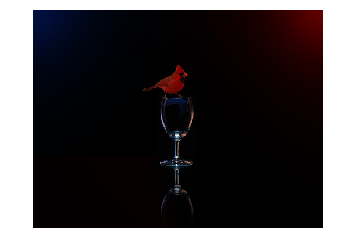

a               0.4            , attn: 0.97
computer        0.096          , attn: 0.23
desk            0.061          , attn: 0.15
has             0.015          , attn: 0.037
been            0.0064         , attn: 0.016
photographed    0.005          , attn: 0.012
in              0.0011         , attn: 0.0026
<UNK>           0.0025         , attn: 0.006
<UNK>           0.0062         , attn: 0.015
<END>           0.015          , attn: 0.036
- - - -
P/G: 0/0.0 | Avg reward: 0.04512019827961922


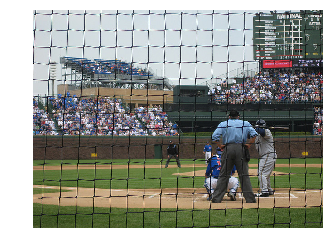

a               0.11           , attn: 0.23
<UNK>           0.29           , attn: 0.59
of              1.3e-06        , attn: 2.5e-06
assorted        2e-09          , attn: 4.1e-09
vegetables      7.9e-17        , attn: 1.6e-16
on              2e-18          , attn: 4e-18
a               2.9e-20        , attn: 5.8e-20
plate           3.7e-22        , attn: 7.5e-22
<END>           3e-19          , attn: 6.1e-19
- - - -
P/G: 0/0.0 | Avg reward: 0.021501833572983742


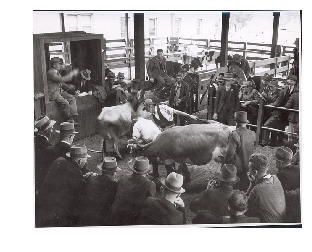

one             0.18           , attn: 0.86
zebra           0.034          , attn: 0.16
is              6e-05          , attn: 0.00029
<UNK>           0.00049        , attn: 0.0023
another         4.4e-07        , attn: 2.1e-06
in              1.2e-08        , attn: 5.5e-08
a               2.6e-10        , attn: 1.3e-09
rocky           4.1e-10        , attn: 1.9e-09
area            3.5e-12        , attn: 1.7e-11
<END>           1.7e-10        , attn: 8.3e-10
- - - -
P/G: 0/0.0 | Avg reward: 0.015771187841892242


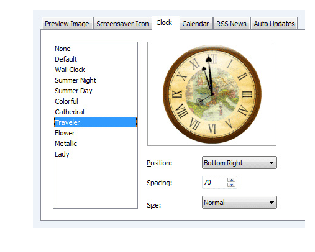

a               0.24           , attn: 0.47
baby            7.6e-06        , attn: 1.5e-05
holding         4.2e-09        , attn: 8.4e-09
a               2.2e-12        , attn: 4.4e-12
<UNK>           1.1e-10        , attn: 2.2e-10
army            2.4e-14        , attn: 4.8e-14
knife           3.6e-16        , attn: 7.3e-16
with            5.8e-18        , attn: 1.2e-17
an              1.3e-18        , attn: 2.7e-18
<UNK>           7e-16          , attn: 1.4e-15
look            1.7e-17        , attn: 3.5e-17
on              7.6e-19        , attn: 1.5e-18
his             1e-21          , attn: 2.1e-21
face            7.4e-22        , attn: 1.5e-21
<END>           1.3e-18        , attn: 2.6e-18
- - - -
P/G: 0/0.0 | Avg reward: 0.04213455691933632


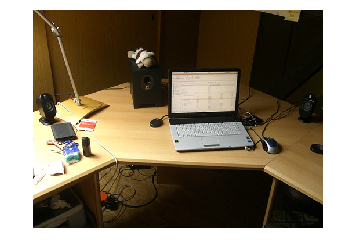

a               0.42           , attn: 1.0
train           0.00098        , attn: 0.0023
traveling       1.1e-05        , attn: 2.7e-05
down            9e-07          , attn: 2.1e-06
a               1.3e-07        , attn: 3.1e-07
track           6.7e-07        , attn: 1.6e-06
in              7.7e-08        , attn: 1.8e-07
a               1.6e-08        , attn: 3.8e-08
<UNK>           3e-07          , attn: 7e-07
<END>           6.5e-06        , attn: 1.5e-05
- - - -


0.76059741

In [7]:
disc.examine_validation(sess, batch_size=5, to_examine=True, print_acc=True)

In [8]:
model_name = "discriminator2"
disc.save_model(sess, model_name=model_name)

### Assign rewards

P/G: 0/1.0 | Avg reward: 0.047550514340400696


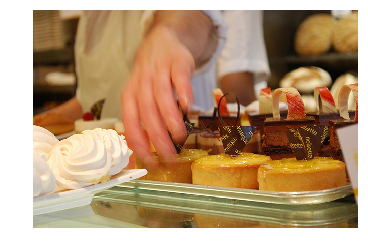

beautiful       0.19           , attn: 0.73
pastries        6.3e-07        , attn: 2.4e-06
with            3.2e-09        , attn: 1.2e-08
hand            2.4e-12        , attn: 9.1e-12
- - - -
P/G: 0/1.0 | Avg reward: 0.026564287021756172


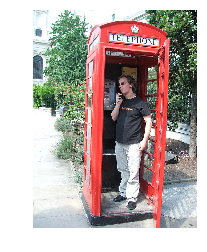

a               0.24           , attn: 0.76
man             0.00025        , attn: 0.00079
in              1.1e-06        , attn: 3.5e-06
black           6.8e-09        , attn: 2.2e-08
t-shirt         2.3e-10        , attn: 7.3e-10
in              7e-12          , attn: 2.2e-11
red             2.4e-12        , attn: 7.6e-12
phone           3.3e-12        , attn: 1e-11
booth           1.9e-13        , attn: 5.9e-13
- - - -
P/G: 1/1.0 | Avg reward: 0.14483438432216644


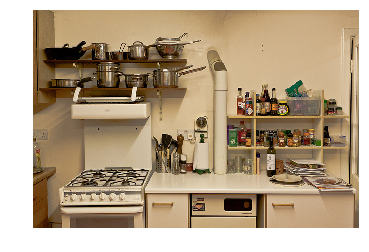

cat             0.58           , attn: 0.99
dogs            0.00011        , attn: 0.00019
one             1.1e-05        , attn: 1.9e-05
<UNK>           0.00012        , attn: 0.0002
- - - -


In [9]:
train_image_idx = np.array([1, 2, 3])
captions = np.array(["beautiful pastries with hand", "a man in black t-shirt in red phone booth", "cat dogs one helloo"])
_, rewards, _ = disc.assign_reward(sess, 
                                   train_image_idx, 
                                   captions,
                                   image_idx_from_training=True, 
                                   to_examine=True)
assert rewards.shape[0] == len(train_image_idx)
sess.close()

### Load Model

In [10]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
loaded_disc = DiscriminatorWrapper(train_data, val_data, vocab_data,
                                   load_session=sess,
                                   saved_model_name=model_name,
                                   learner_type=learner)
                                   

INFO:tensorflow:Restoring parameters from models/discr/discriminator2
Building learner textual_attn...


In [11]:
_, rewards_after_loaded, _ = loaded_disc.assign_reward(sess, 
                                                       train_image_idx, 
                                                       captions,
                                                       image_idx_from_training=True, 
                                                       to_examine=False)

assert np.array_equal(rewards, rewards_after_loaded), "Loaded model should assign same rewards as trained model"

val accuracy: 0.425
[[12  8]
 [15  5]]
P/G: 0/1.0 | Avg reward: 0.02086024172604084


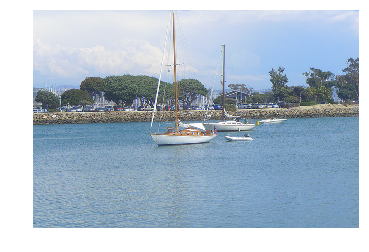

sailboats       0.14           , attn: 1.0
and             0.022          , attn: 0.15
their           0.0043         , attn: 0.03
<UNK>           0.0055         , attn: 0.039
moored          0.0097         , attn: 0.068
in              0.0025         , attn: 0.017
the             0.00061        , attn: 0.0043
water           0.00048        , attn: 0.0034
<END>           0.00079        , attn: 0.0056
- - - -
P/G: 0/1.0 | Avg reward: 0.00169268692843616


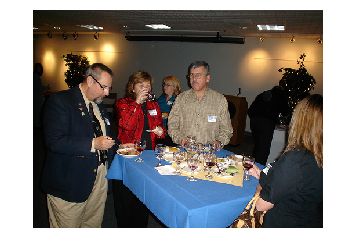

a               0.019          , attn: 0.1
group           1.7e-05        , attn: 9.2e-05
of              1.2e-11        , attn: 6.6e-11
people          1.3e-17        , attn: 7.2e-17
standing        7.8e-21        , attn: 4.2e-20
around          3.5e-26        , attn: 1.9e-25
a               3.9e-28        , attn: 2.1e-27
table           1.1e-30        , attn: 6.1e-30
having          1.3e-31        , attn: 7.1e-31
drinks          3.3e-33        , attn: 1.8e-32
<END>           2.9e-26        , attn: 1.6e-25
- - - -
P/G: 1/1.0 | Avg reward: 0.0525352843105793


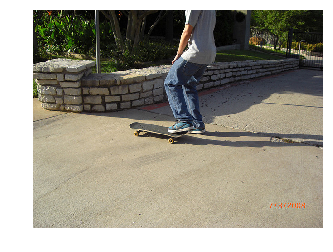

a               0.51           , attn: 1.0
boy             0.0099         , attn: 0.019
wearing         0.001          , attn: 0.002
blue            0.00029        , attn: 0.00056
jeans           6.8e-05        , attn: 0.00013
is              1.2e-05        , attn: 2.3e-05
riding          8.8e-07        , attn: 1.7e-06
a               1.1e-07        , attn: 2.2e-07
skateboard      4e-07          , attn: 7.7e-07
<END>           3.9e-06        , attn: 7.6e-06
- - - -
P/G: 1/1.0 | Avg reward: 0.05837206915020943


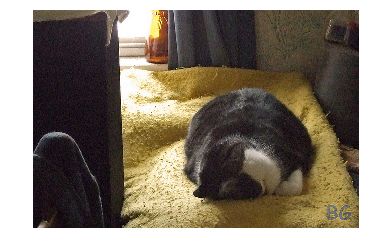

a               0.58           , attn: 0.99
cat             0.00014        , attn: 0.00025
laying          2.8e-06        , attn: 4.8e-06
on              3e-08          , attn: 5e-08
a               2.3e-09        , attn: 3.9e-09
blanket         2.8e-10        , attn: 4.7e-10
near            3.4e-11        , attn: 5.8e-11
a               1e-11          , attn: 1.7e-11
window          1.6e-10        , attn: 2.7e-10
<END>           1.1e-08        , attn: 1.8e-08
- - - -
P/G: 0/1.0 | Avg reward: 0.036941397935152054


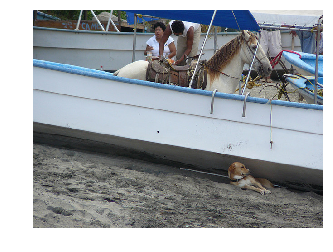

a               0.48           , attn: 1.0
dog             0.00014        , attn: 0.00028
lying           1.1e-05        , attn: 2.2e-05
underneath      3.7e-06        , attn: 7.8e-06
a               2.6e-07        , attn: 5.4e-07
<UNK>           2.8e-06        , attn: 5.9e-06
that            1.8e-07        , attn: 3.7e-07
has             7.6e-08        , attn: 1.6e-07
a               1e-08          , attn: 2.1e-08
horse           4.1e-10        , attn: 8.5e-10
in              2.1e-10        , attn: 4.3e-10
it              7.7e-11        , attn: 1.6e-10
<END>           2.2e-09        , attn: 4.6e-09
- - - -
P/G: 1/1.0 | Avg reward: 0.0768980085849762


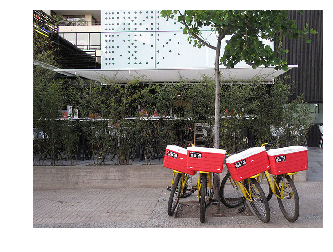

four            0.64           , attn: 0.99
bicycles        0.053          , attn: 0.083
with            0.00056        , attn: 0.00087
baskets         0.00026        , attn: 0.00041
parked          0.00012        , attn: 0.00018
under           1e-05          , attn: 1.6e-05
a               7.2e-07        , attn: 1.1e-06
tree            3.5e-06        , attn: 5.5e-06
<END>           4.4e-06        , attn: 6.9e-06
- - - -
P/G: 0/1.0 | Avg reward: 0.00874074175953865


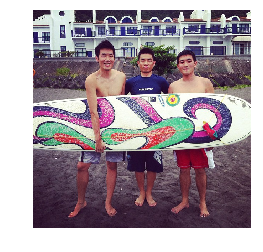

three           0.12           , attn: 0.31
young           1.3e-08        , attn: 3.3e-08
men             8.4e-16        , attn: 2.1e-15
holding         6.4e-21        , attn: 1.6e-20
a               4.6e-25        , attn: 1.2e-24
large           7.7e-29        , attn: 1.9e-28
surf            1.4e-30        , attn: 3.4e-30
board           2.7e-32        , attn: 6.8e-32
are             1.2e-33        , attn: 3e-33
posing          1.5e-33        , attn: 3.7e-33
for             0.0            , attn: 0.0
the             0.0            , attn: 0.0
camera          0.0            , attn: 0.0
<END>           7.3e-30        , attn: 1.8e-29
- - - -
P/G: 1/1.0 | Avg reward: 0.033467572182416916


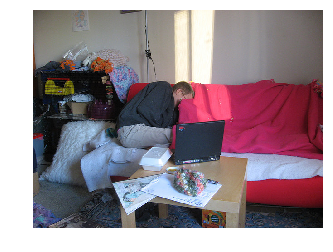

there           0.37           , attn: 0.7
is              0.0023         , attn: 0.0045
a               1.7e-06        , attn: 3.3e-06
man             1.5e-11        , attn: 2.8e-11
hiding          4.4e-13        , attn: 8.3e-13
his             6.8e-17        , attn: 1.3e-16
face            1.3e-18        , attn: 2.5e-18
in              1e-18          , attn: 2e-18
a               2e-19          , attn: 3.9e-19
blanket         4.5e-20        , attn: 8.5e-20
<END>           9.8e-17        , attn: 1.9e-16
- - - -
P/G: 0/1.0 | Avg reward: 0.0354202501475811


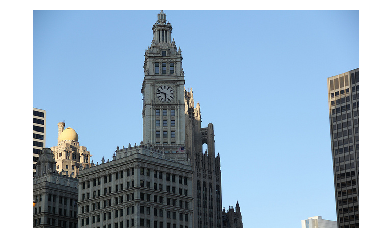

a               0.29           , attn: 0.88
clock           0.094          , attn: 0.29
tower           0.041          , attn: 0.13
on              0.0019         , attn: 0.0058
the             7.8e-05        , attn: 0.00024
top             8.6e-05        , attn: 0.00026
of              6.8e-06        , attn: 2.1e-05
an              1.4e-06        , attn: 4.3e-06
old             7.1e-08        , attn: 2.2e-07
style           6.2e-08        , attn: 1.9e-07
building        3.9e-08        , attn: 1.2e-07
<END>           2.2e-07        , attn: 6.7e-07
- - - -
P/G: 0/1.0 | Avg reward: 0.012026219628751278


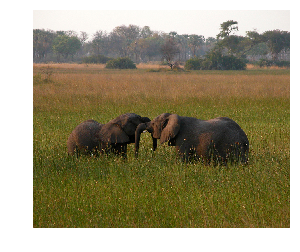

two             0.09           , attn: 0.69
<UNK>           0.088          , attn: 0.67
elephant        0.0023         , attn: 0.017
laying          1.8e-05        , attn: 0.00014
in              1.3e-07        , attn: 9.9e-07
the             1.4e-10        , attn: 1.1e-09
grass           5.8e-10        , attn: 4.4e-09
looks           7.1e-11        , attn: 5.4e-10
like            1.1e-12        , attn: 8.1e-12
<UNK>           1.3e-11        , attn: 9.7e-11
hugging         3.8e-12        , attn: 2.9e-11
by              5.7e-13        , attn: 4.3e-12
their           2.6e-15        , attn: 2e-14
trucks          4.1e-16        , attn: 3.1e-15
<END>           7.9e-14        , attn: 6e-13
- - - -
P/G: 0/1.0 | Avg reward: 0.03297858685255051


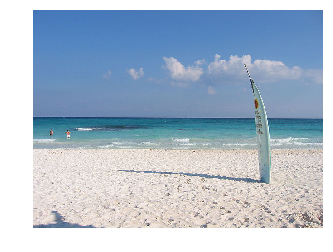

a               0.26           , attn: 0.96
light           0.041          , attn: 0.15
blue            0.016          , attn: 0.06
surfboard       0.011          , attn: 0.04
standing        0.0014         , attn: 0.0053
upright         0.0012         , attn: 0.0044
on              0.00027        , attn: 0.001
the             7.9e-05        , attn: 0.00029
beach           3.5e-05        , attn: 0.00013
<END>           0.00016        , attn: 0.00058
- - - -
P/G: 0/1.0 | Avg reward: 0.005971199832856655


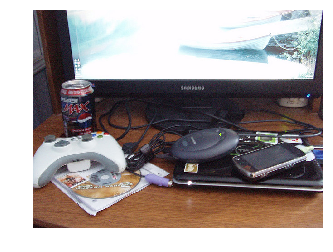

a               0.025          , attn: 0.35
cluttered       0.036          , attn: 0.51
desk            0.017          , attn: 0.24
with            3.4e-07        , attn: 4.8e-06
various         1.3e-08        , attn: 1.8e-07
electronics     6.1e-09        , attn: 8.7e-08
placed          4e-11          , attn: 5.7e-10
in              1e-13          , attn: 1.5e-12
front           4.4e-16        , attn: 6.2e-15
of              1.4e-18        , attn: 2e-17
a               1.8e-21        , attn: 2.6e-20
monitor         3e-19          , attn: 4.2e-18
<END>           1e-16          , attn: 1.4e-15
- - - -
P/G: 0/1.0 | Avg reward: 2.3124634026316926e-05


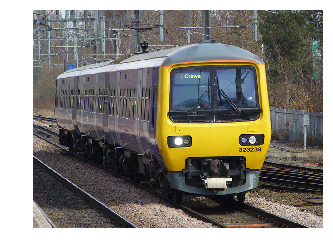

a               0.00025        , attn: 0.002
yellow          5e-06          , attn: 3.9e-05
trolley         2.4e-06        , attn: 1.9e-05
on              4.7e-12        , attn: 3.8e-11
the             1e-17          , attn: 8.1e-17
tracks          2e-14          , attn: 1.6e-13
in              1.8e-19        , attn: 1.4e-18
a               4.5e-24        , attn: 3.6e-23
wooded          1.2e-20        , attn: 9.4e-20
area            2.6e-23        , attn: 2.1e-22
<END>           9.2e-19        , attn: 7.3e-18
- - - -
P/G: 1/1.0 | Avg reward: 0.05408069118857384


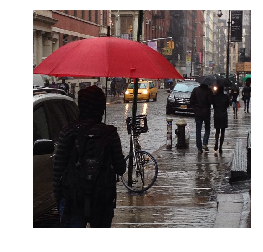

several         0.7            , attn: 1.0
people          2e-05          , attn: 2.8e-05
walking         8.9e-09        , attn: 1.3e-08
down            6.9e-12        , attn: 9.8e-12
a               7.9e-14        , attn: 1.1e-13
sidewalk        6.1e-13        , attn: 8.6e-13
holding         4e-15          , attn: 5.7e-15
umbrellas       9.1e-14        , attn: 1.3e-13
<UNK>           1.3e-11        , attn: 1.8e-11
it              3.4e-14        , attn: 4.8e-14
is              5e-15          , attn: 7.1e-15
<UNK>           2.3e-13        , attn: 3.3e-13
<END>           2.8e-11        , attn: 4e-11
- - - -
P/G: 0/1.0 | Avg reward: 0.034364182502031326


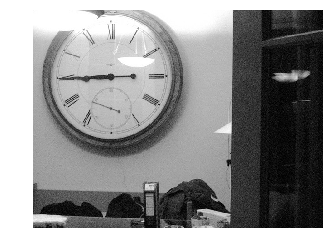

a               0.3            , attn: 0.97
clock           0.0044         , attn: 0.014
on              9e-06          , attn: 2.9e-05
the             6.7e-08        , attn: 2.1e-07
wall            8.5e-09        , attn: 2.7e-08
reads           1.3e-09        , attn: 4e-09
<UNK>           5.4e-08        , attn: 1.7e-07
<UNK>           1.4e-06        , attn: 4.5e-06
<END>           2.8e-05        , attn: 8.9e-05
- - - -
P/G: 0/1.0 | Avg reward: 0.05587086081504822


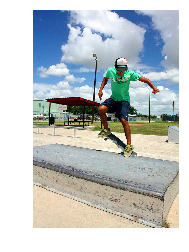

a               0.22           , attn: 0.52
skateboarder    0.22           , attn: 0.53
performs        0.12           , attn: 0.28
a               6.5e-05        , attn: 0.00015
trick           9.4e-07        , attn: 2.2e-06
making          7.1e-09        , attn: 1.7e-08
his             1.9e-11        , attn: 4.4e-11
board           3.5e-11        , attn: 8.3e-11
stand           3.5e-12        , attn: 8.3e-12
<END>           2.1e-10        , attn: 5e-10
- - - -
P/G: 0/1.0 | Avg reward: 0.004129200708121061


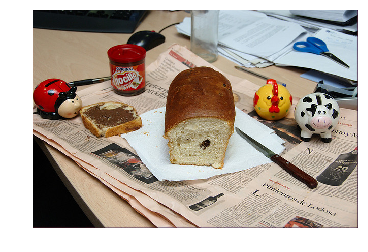

small           0.045          , attn: 0.2
half            2.6e-06        , attn: 1.1e-05
loaf            2e-09          , attn: 8.7e-09
of              1.8e-12        , attn: 7.9e-12
bread           5.2e-17        , attn: 2.3e-16
sitting         2.4e-19        , attn: 1e-18
on              3.6e-20        , attn: 1.6e-19
a               8e-22          , attn: 3.5e-21
paper           4.2e-22        , attn: 1.8e-21
towel           1.7e-22        , attn: 7.3e-22
<END>           4.3e-19        , attn: 1.9e-18
- - - -
P/G: 0/1.0 | Avg reward: 0.04672406241297722


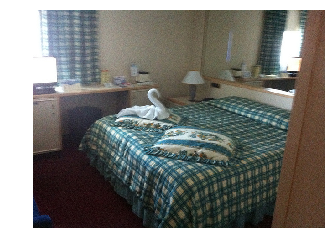

a               0.46           , attn: 1.0
bed             0.0071         , attn: 0.015
is              0.00099        , attn: 0.0021
shown           0.00034        , attn: 0.00074
with            1e-05          , attn: 2.2e-05
pillows         6.5e-06        , attn: 1.4e-05
and             1.3e-06        , attn: 2.7e-06
a               8.9e-07        , attn: 1.9e-06
towel           3.7e-07        , attn: 8e-07
<END>           3.2e-06        , attn: 7e-06
- - - -
P/G: 0/1.0 | Avg reward: 0.031317707151174545


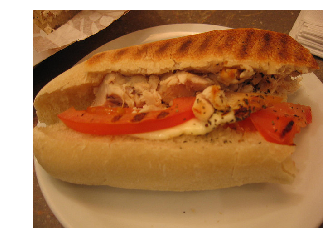

a               0.28           , attn: 0.67
sandwich        3.5e-10        , attn: 8.3e-10
with            7.1e-14        , attn: 1.7e-13
toasted         2.5e-18        , attn: 6e-18
bread           8.3e-26        , attn: 2e-25
on              3.6e-26        , attn: 8.6e-26
a               5.5e-26        , attn: 1.3e-25
plate           1.3e-28        , attn: 3.2e-28
<END>           5.4e-24        , attn: 1.3e-23
- - - -
P/G: 0/1.0 | Avg reward: 0.011839362792670727


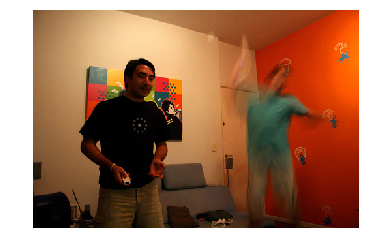

two             0.14           , attn: 0.44
people          1.9e-07        , attn: 5.9e-07
in              3.8e-11        , attn: 1.2e-10
a               1.3e-13        , attn: 4.1e-13
room            2.7e-17        , attn: 8.4e-17
looks           5.3e-19        , attn: 1.7e-18
to              2e-21          , attn: 6.2e-21
be              3.9e-22        , attn: 1.2e-21
playing         8.5e-23        , attn: 2.7e-22
wii             4.3e-23        , attn: 1.3e-22
game            2.4e-22        , attn: 7.5e-22
<END>           4.7e-19        , attn: 1.5e-18
- - - -
P/G: 1/0.0 | Avg reward: 0.14479665458202362


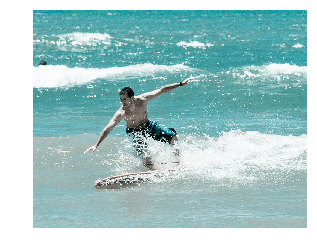

a               0.73           , attn: 0.8
planter         0.69           , attn: 0.76
box             0.032          , attn: 0.036
of              0.0016         , attn: 0.0018
vegetables      4.3e-05        , attn: 4.7e-05
in              4.6e-06        , attn: 5.1e-06
a               3e-07          , attn: 3.4e-07
fenced          4.1e-07        , attn: 4.5e-07
garden          1.6e-06        , attn: 1.8e-06
<END>           1.1e-05        , attn: 1.2e-05
- - - -
P/G: 1/0.0 | Avg reward: 0.029513733461499214


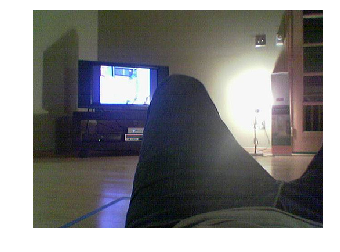

people          0.52           , attn: 0.93
hang            0.0071         , attn: 0.013
out             9.1e-06        , attn: 1.6e-05
along           2.2e-07        , attn: 4e-07
a               6.5e-09        , attn: 1.2e-08
<UNK>           1.9e-07        , attn: 3.3e-07
of              4.8e-09        , attn: 8.5e-09
beach           2.1e-10        , attn: 3.8e-10
while           8.7e-12        , attn: 1.5e-11
a               9.3e-13        , attn: 1.7e-12
parasailing     1.8e-10        , attn: 3.1e-10
person          2.8e-12        , attn: 5e-12
is              1e-12          , attn: 1.8e-12
towed           5.5e-12        , attn: 9.8e-12
by              8.6e-13        , attn: 1.5e-12
a               3.2e-13        , attn: 5.6e-13
boat            1.6e-13        , attn: 2.8e-13
<END>           3.3e-11        , attn: 5.8e-11
- - - -
P/G: 0/0.0 | Avg reward: 0.0015927264466881752


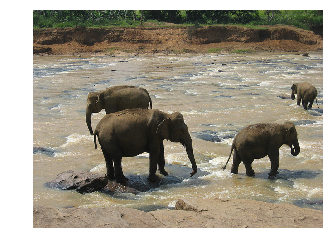

a               0.019          , attn: 0.64
woman           5.8e-07        , attn: 1.9e-05
is              5.4e-10        , attn: 1.8e-08
walking         7.2e-14        , attn: 2.4e-12
through         1.4e-15        , attn: 4.7e-14
a               7.4e-19        , attn: 2.5e-17
rainy           9.8e-17        , attn: 3.3e-15
street          2.4e-17        , attn: 8.1e-16
under           4.3e-18        , attn: 1.5e-16
an              2.9e-19        , attn: 9.7e-18
umbrella        5.5e-18        , attn: 1.9e-16
<END>           2.8e-15        , attn: 9.4e-14
- - - -
P/G: 0/0.0 | Avg reward: 0.0005966011667624116


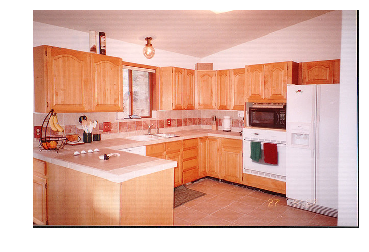

a               0.0054         , attn: 0.011
white           4.5e-07        , attn: 9.3e-07
sink            6e-10          , attn: 1.2e-09
with            4.8e-15        , attn: 9.8e-15
three           3e-16          , attn: 6.1e-16
cups            1.8e-18        , attn: 3.8e-18
behind          1.4e-19        , attn: 2.9e-19
it              7e-24          , attn: 1.5e-23
<END>           2.7e-21        , attn: 5.5e-21
- - - -
P/G: 0/0.0 | Avg reward: 0.015770038589835167


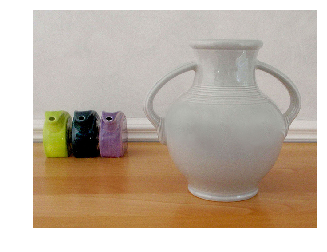

white           0.25           , attn: 1.0
and             0.005          , attn: 0.02
brown           0.00058        , attn: 0.0023
goats           6.2e-06        , attn: 2.5e-05
in              6.1e-07        , attn: 2.5e-06
a               2.3e-08        , attn: 9.3e-08
pen             1.4e-08        , attn: 5.6e-08
looking         3.3e-09        , attn: 1.3e-08
at              5.5e-10        , attn: 2.2e-09
a               6.3e-11        , attn: 2.5e-10
white           6.4e-11        , attn: 2.6e-10
brown           1.3e-10        , attn: 5.2e-10
and             5.9e-11        , attn: 2.4e-10
black           6.1e-11        , attn: 2.5e-10
dog             3.3e-12        , attn: 1.3e-11
<END>           1e-10          , attn: 4.1e-10
- - - -
P/G: 1/0.0 | Avg reward: 0.01675090380012989


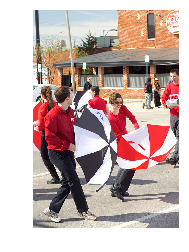

a               0.17           , attn: 0.28
man             2.9e-06        , attn: 4.9e-06
and             1.4e-09        , attn: 2.3e-09
woman           1.5e-13        , attn: 2.5e-13
are             3.2e-15        , attn: 5.2e-15
checking        2.8e-15        , attn: 4.7e-15
out             9.5e-18        , attn: 1.6e-17
yellow          1e-18          , attn: 1.7e-18
airplane        1.3e-17        , attn: 2.1e-17
<END>           5.5e-15        , attn: 9e-15
- - - -
P/G: 0/0.0 | Avg reward: 0.00035801908234134316


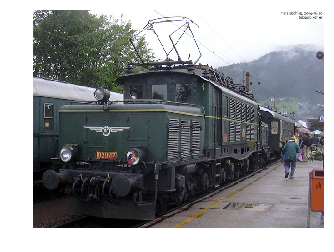

toasted         0.0036         , attn: 0.99
sandwiches      1.5e-06        , attn: 0.00041
on              2.7e-07        , attn: 7.4e-05
plates          1.9e-07        , attn: 5.3e-05
sit             8.7e-09        , attn: 2.4e-06
alongside       2.1e-08        , attn: 5.8e-06
cups            5.4e-09        , attn: 1.5e-06
of              1.2e-09        , attn: 3.5e-07
coffee          7.9e-11        , attn: 2.2e-08
<END>           1.1e-09        , attn: 3.1e-07
- - - -
P/G: 1/0.0 | Avg reward: 0.06201162189245224


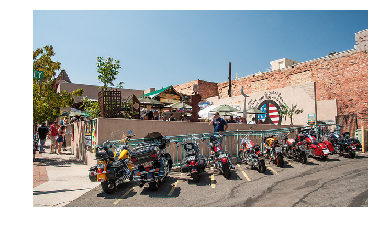

a               0.74           , attn: 1.0
small           0.039          , attn: 0.052
black           0.018          , attn: 0.024
bear            0.0055         , attn: 0.0074
sitting         0.00085        , attn: 0.0011
in              0.00061        , attn: 0.00082
a               0.00021        , attn: 0.00028
<UNK>           0.00091        , attn: 0.0012
holding         0.00024        , attn: 0.00033
a               9.9e-05        , attn: 0.00013
red             0.00017        , attn: 0.00023
ball            8.6e-05        , attn: 0.00012
<END>           0.00049        , attn: 0.00066
- - - -
P/G: 1/0.0 | Avg reward: 0.05794502794742584


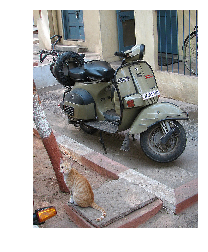

a               0.52           , attn: 0.71
birthday        2.6e-07        , attn: 3.6e-07
cake            7.8e-14        , attn: 1.1e-13
is              5.9e-16        , attn: 8.1e-16
decorated       1.6e-16        , attn: 2.2e-16
with            2.7e-20        , attn: 3.6e-20
<UNK>           6.8e-18        , attn: 9.3e-18
birds           5e-18          , attn: 6.9e-18
<END>           6.4e-16        , attn: 8.7e-16
- - - -
P/G: 0/0.0 | Avg reward: 0.027336781844496727


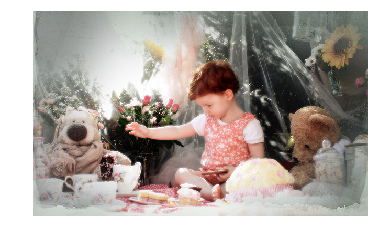

a               0.27           , attn: 0.99
fighter         0.00092        , attn: 0.0033
jet             0.00049        , attn: 0.0018
flying          5.7e-06        , attn: 2.1e-05
through         3.9e-07        , attn: 1.4e-06
a               4.4e-09        , attn: 1.6e-08
cloudy          1e-07          , attn: 3.7e-07
blue            4.2e-08        , attn: 1.5e-07
sky             4.2e-08        , attn: 1.5e-07
<END>           5.9e-07        , attn: 2.1e-06
- - - -
P/G: 0/0.0 | Avg reward: 0.024522721767425537


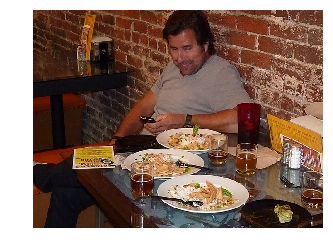

a               0.27           , attn: 0.93
man             8.5e-05        , attn: 0.00029
brushing        2.3e-08        , attn: 8e-08
his             2.5e-13        , attn: 8.5e-13
teeth           1.1e-15        , attn: 3.9e-15
with            3.4e-18        , attn: 1.2e-17
an              3.8e-20        , attn: 1.3e-19
electric        5.1e-18        , attn: 1.8e-17
tooth           1.1e-19        , attn: 3.7e-19
brush           1.4e-19        , attn: 5e-19
<END>           1.3e-17        , attn: 4.4e-17
- - - -
P/G: 1/0.0 | Avg reward: 0.06554358452558517


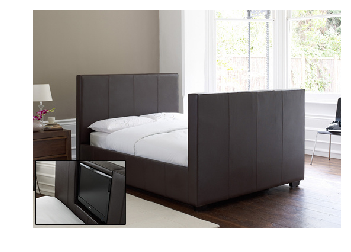

a               0.56           , attn: 0.99
giraffe         0.029          , attn: 0.051
is              0.00017        , attn: 0.0003
standing        1.1e-06        , attn: 1.9e-06
in              2.4e-08        , attn: 4.2e-08
a               5.9e-10        , attn: 1e-09
grassy          2.8e-09        , attn: 5e-09
field           2.6e-08        , attn: 4.6e-08
<END>           4e-07          , attn: 7.1e-07
- - - -
P/G: 1/0.0 | Avg reward: 0.011811395175755024


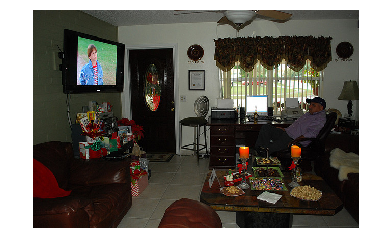

a               0.15           , attn: 0.3
close           0.00012        , attn: 0.00024
up              3.2e-10        , attn: 6.2e-10
of              2.3e-14        , attn: 4.5e-14
a               1.4e-18        , attn: 2.8e-18
child           7.2e-23        , attn: 1.4e-22
brushing        2.2e-24        , attn: 4.3e-24
his             2.6e-29        , attn: 5.1e-29
teeth           2.2e-30        , attn: 4.3e-30
at              2.4e-29        , attn: 4.6e-29
a               3.2e-30        , attn: 6.1e-30
sink            1.6e-29        , attn: 3.1e-29
<END>           2.6e-25        , attn: 5e-25
- - - -
P/G: 0/0.0 | Avg reward: 0.042590562254190445


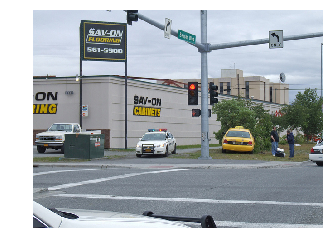

female          0.4            , attn: 0.97
jockey          0.068          , attn: 0.16
riding          0.0014         , attn: 0.0033
a               3.5e-07        , attn: 8.6e-07
horse           3.2e-08        , attn: 7.7e-08
on              3.8e-10        , attn: 9.1e-10
a               2.2e-12        , attn: 5.4e-12
field           2.6e-10        , attn: 6.3e-10
with            4.9e-12        , attn: 1.2e-11
<UNK>           1.3e-10        , attn: 3.2e-10
<END>           9.2e-09        , attn: 2.2e-08
- - - -
P/G: 1/0.0 | Avg reward: 0.05004867538809776


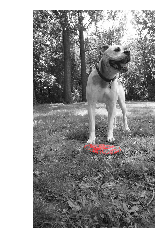

children        0.48           , attn: 0.91
flying          0.045          , attn: 0.085
kites           0.019          , attn: 0.037
in              0.0044         , attn: 0.0083
a               0.00032        , attn: 0.0006
park            0.00026        , attn: 0.00049
on              1.8e-05        , attn: 3.3e-05
a               4e-06          , attn: 7.7e-06
sunny           4.4e-06        , attn: 8.4e-06
day             1.4e-06        , attn: 2.7e-06
<END>           1.7e-05        , attn: 3.2e-05
- - - -
P/G: 0/0.0 | Avg reward: 0.00017312081763520837


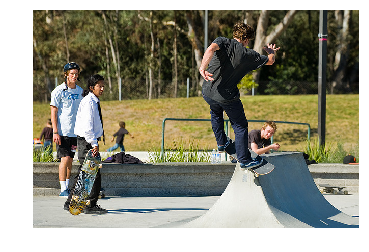

young           0.0023         , attn: 0.0049
man             7.8e-09        , attn: 1.7e-08
is              7.1e-13        , attn: 1.5e-12
holding         2e-17          , attn: 4.2e-17
a               6e-21          , attn: 1.3e-20
baseball        6.3e-21        , attn: 1.4e-20
glove           3.1e-20        , attn: 6.7e-20
and             1.3e-22        , attn: 2.8e-22
wearing         6.5e-25        , attn: 1.4e-24
a               3.3e-27        , attn: 7.1e-27
baseball        1.2e-25        , attn: 2.7e-25
cap             5.7e-24        , attn: 1.2e-23
<END>           1.4e-19        , attn: 3e-19
- - - -
P/G: 0/0.0 | Avg reward: 1.2822880535168224e-07


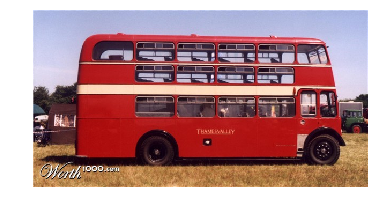

a               1.5e-06        , attn: 4.9e-06
dog             7.3e-21        , attn: 2.3e-20
sits            2.9e-19        , attn: 9e-19
on              4.3e-28        , attn: 1.3e-27
the             0.0            , attn: 0.0
couch           0.0            , attn: 0.0
with            0.0            , attn: 0.0
a               0.0            , attn: 0.0
book            0.0            , attn: 0.0
beside          0.0            , attn: 0.0
it              0.0            , attn: 0.0
<END>           0.0            , attn: 0.0
- - - -
P/G: 0/0.0 | Avg reward: 0.021306684240698814


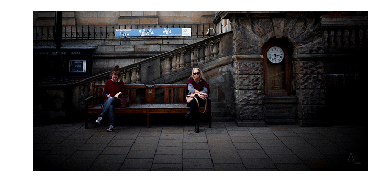

the             0.19           , attn: 0.98
bear            0.00082        , attn: 0.0042
is              5.7e-06        , attn: 2.9e-05
<UNK>           2.3e-05        , attn: 0.00012
down            1.8e-07        , attn: 9e-07
beside          5e-09          , attn: 2.6e-08
the             5.2e-11        , attn: 2.7e-10
tree            2.7e-09        , attn: 1.4e-08
<END>           3.6e-08        , attn: 1.9e-07
- - - -
P/G: 0/0.0 | Avg reward: 0.002567954594269395


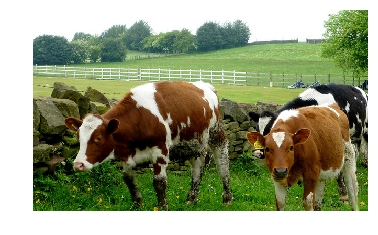

people          0.026          , attn: 0.64
raising         2.7e-06        , attn: 6.8e-05
their           2.2e-11        , attn: 5.4e-10
glasses         4e-12          , attn: 9.9e-11
during          6.3e-15        , attn: 1.6e-13
a               6.3e-18        , attn: 1.6e-16
wine            8e-21          , attn: 2e-19
tasting         9.7e-23        , attn: 2.4e-21
event           2.6e-22        , attn: 6.3e-21
<END>           4.7e-19        , attn: 1.2e-17
- - - -
P/G: 0/0.0 | Avg reward: 0.04922262579202652


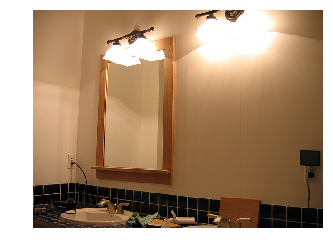

a               0.41           , attn: 0.85
baseball        0.13           , attn: 0.26
player          0.0033         , attn: 0.0068
pitching        0.0032         , attn: 0.0066
a               6.5e-07        , attn: 1.3e-06
baseball        5.4e-07        , attn: 1.1e-06
on              6.9e-10        , attn: 1.4e-09
a               3e-12          , attn: 6.2e-12
baseball        2.6e-11        , attn: 5.5e-11
field           1.6e-10        , attn: 3.2e-10
<END>           1.3e-08        , attn: 2.6e-08
- - - -


0.91320479

In [12]:
loaded_disc.examine_validation(sess, batch_size=5, to_examine=False, print_acc=True)

### Online train